# Introduction to Modern Mathematical Modeling: A User’s Manual to Train Mathematical Consultants
<b> A Cambridge University Press book by Samuel S.P. Shen</b> 

<b>The computer codes of this book were edited and proofread by Joaquin Stawsky and Momtaza Sayd.</b>

## Chapter 7: Probabilistic Models
Often times it is necessary to model something that is non-deterministic
in nature. Probability is the measure of
randomness and probabilistic models allow us to systematically
examine such processes. What is the probability of getting a
winning lottery ticket? What is the chance that out of 5 coin
tosses 2 will be head? What is the chance that a random person's
height is within a given range? Problems like these can be
better understood by determining the probability distribution
that the outcomes belong to. We'll start by looking at some
common probability distributions; but before we do, let's talk
briefly about *Random Variables*. A Random Variable $X$ is a
variable that has a certain probability of being equal to a
value $x \in \Omega$, where $\Omega$ is the sample space of $X$.
The sample space is the set of all possible outcomes of what
$X$ represents. The value of that probability, $p \in
\mathbb{R}, 0 \leq p \leq 1$, is typically
denoted $P(X = x) = p$ (this is commonly read as ''The
probability that $X$ is equal to $x$'') for some $x \in \Omega$.
A common name for it is the Probability Mass Function (pmf) of the
distribution; in fact, a defining feature of probability distribution
is the definition of it's pmf, as we'll see momentarily.

### A Few Discrete Probability Distributions
1. Uniform Distribution
> A Uniform Distribution is defined as $X \sim$ Unif($\Omega$), with
> $P(X=x) = \frac{1}{n}$, where $n$ is the number of possible outcomes in
> $\Omega$. Every outcome is equally likely with this distribution, and
> so it most resembles the general conception of ''Random'' that people
> tend to have. A good example of something that is ''uniformly distributed''
> is the outcome of singe die rolls.
>
2. Bernoulli Distribution
> A Bernoulli Distribution is defined as $X \sim$ Ber$(p)$, with $P(X = 1)
> = p$. This distribution is rather simple because in all case our sample
> space is $\Omega = \{0, 1\}$, where 1 corresponds to ''a thing happened''
> and 0 corresponds to ''a thing DID NOT happen''. In other words; there are
> 2 possible outcomes, they're mutually exclusive, and they're jointly
> exhaustive. i.e: $P(X = 1) = p$ and $P(X = 0) = 1 - p$, and $P(X = 1) +
> P(X = 0) = p + 1 - p = 1$. A good example of something that is ''bernoulli
> distributed'' is the outcome of single coin tosses.

In [1]:
import numpy as np
from numpy import random as rando
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
styledict = {'xtick.labelsize':25,
             'xtick.major.size':9,
             'xtick.major.width':1,
             'ytick.labelsize':25,
             'ytick.major.size':9,
             'ytick.major.width':1,
             'legend.framealpha':0.0,
             'legend.fontsize':15,
             'axes.labelsize':20,
             'axes.titlesize':25,
             'axes.linewidth':2,
             'figure.figsize':(12,8),
             'savefig.format':'jpg'}
plt.rcParams.update(**styledict)

### Simulation using `python`

In trying to determine the probability of an event, computer aided simulation
is a powerful tool at our disposal. The `random` module of `numpy` has several
functions that generate sets of pseudo-random numbers within a given distribution.
Computers are, by their nature, deterministic machines and nothing they do can be
''random'' because they are following a set of instructions that we give them. So
what the functions in `numpy.random` really give us is the output from an algorithm
that *simulates* the relevant probability distribution. As such, we don't have
access to sets of truly random numbers; but the discreet benefit of this is that
any results from our simulations using these pseudo-random numbers are replicable.
This is because these pseudo-random number generators use something known as a
''seed value'' when they start to generate numbers, and this value dictates the
sequence of values that the generator will return. This seed value can be set
manually, like so:

In [3]:
rando.seed(37)
x = rando.randint(10, size=(1, 5))
print(f"Not-so-random vector x: {x}")

Not-so-random vector x: [[5 6 3 3 5]]


Every time the cell above is run, the seed is reset with the given seed value
and the next set of uses of `randint` will always return the same sequence of
values.

In [4]:
rolls = rando.randint(low=1, high=7, size=(int(1e8),2))
rollSums = rolls[:,0] + rolls[:,1]

place = np.where(rollSums == 7)[0]

print(f"Simulated probability that the sum of 2 dice is 7: "
      f"{place.shape[0]/rollSums.shape[0]:5.4f}")
x = 1/6
print("Calculated probability that the sum of 2 dice is 7: ", 1/6)

Simulated probability that the sum of 2 dice is 7: 0.1666
Calculated probability that the sum of 2 dice is 7:  0.16666666666666666


In [5]:
d = (1/3)
l = d*(2/3)

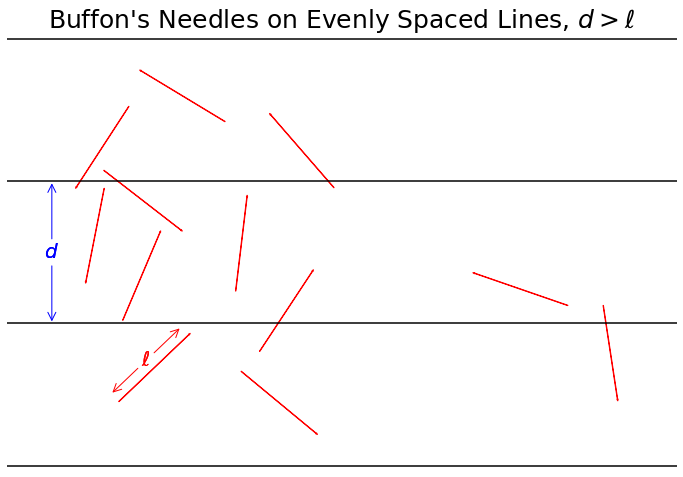

In [6]:
#Figure 7.1
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.axis('off')
ax.set_title("Buffon's Needles on Evenly Spaced Lines, $d > \ell$")

ax.set_xlim(0, 1.5)
ax.set_ylim(0-1e-2, 1+1e-2)

for i in range(4):
    ax.axhline(y=i*(1/3), color='black')

for i in range(11):
    x = rando.uniform(.15, 1.35)
    y = rando.uniform(.15, .85)
    angle = rando.uniform(2*np.pi)
    endx = l*np.cos(angle)
    endy = l*np.sin(angle)
    ax.arrow(x, y, endx, endy, fc='r', ec='r')

ax.annotate("$d$", xy=(.1, 2*d), xytext=(.1, (3*d)/2), color='blue',
            fontsize=20, horizontalalignment="center",
            verticalalignment="center", arrowprops={'arrowstyle':'->',
            'color':'blue'})
ax.annotate("$d$", xy=(.1, d), xytext=(.1, (3*d)/2), color='blue',
            fontsize=20, horizontalalignment="center",
            verticalalignment="center", arrowprops={'arrowstyle':'->',
            'color':'blue'})

# Non-Random Arrow:
begin = (.25, .15)
arrowAng = np.pi/4
arrowLen = (l*np.cos(arrowAng), l*np.sin(arrowAng))
ax.arrow(*begin, *arrowLen, fc='r', ec='r')
mid = (begin[0] + arrowLen[0]/2, begin[1] + arrowLen[1]/2)
offsetAng = arrowAng + np.pi/2
nMid = (mid[0] + .025*np.cos(offsetAng), mid[1] + .025*np.sin(offsetAng))

ax.annotate("$\ell$", xy=(nMid[0] + arrowLen[0]/2, nMid[1] + arrowLen[1]/2),
            xytext=nMid, color='red', size=20,
            horizontalalignment="center", verticalalignment="center",
            arrowprops={'arrowstyle':'->', 'color':'red'})
ax.annotate("$\ell$", xy=(nMid[0] - arrowLen[0]/2, nMid[1] - arrowLen[1]/2),
            xytext=nMid, color='red', size=20,
            horizontalalignment="center", verticalalignment="center",
            arrowprops={'arrowstyle':'->', 'color':'red'})

plt.savefig("CH7;IllustrationofBuffonsNeedleProblem.jpg", bbox_inches='tight')

In [7]:
d = 2
l = np.sqrt(d)
x = np.linspace(-np.pi/2, np.pi/2, 1001)
buff = d-l*np.cos(x)

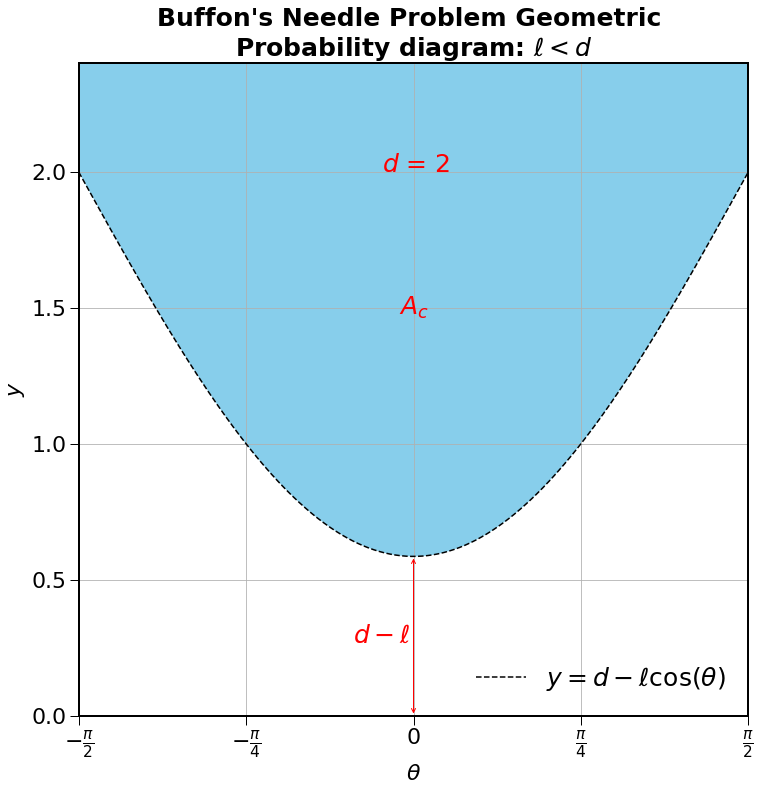

In [8]:
#Figure 7.3
fig, ax = plt.subplots(1,1,figsize=(12,12));

ax.plot(x, buff, 'k--', label=r"$y = d-\ell\cos(\theta)$")

ax.set_xlim(-0.5*np.pi, 0.5*np.pi)
ax.set_ylim(0, d+0.4)
ax.set_title("Buffon's Needle Problem Geometric \nProbability diagram: $\ell < d$"
            ,fontweight="bold")
ax.fill_between(x, buff, 4*np.ones(x.size), fc='skyblue')

ax.set_xlabel(r"$\theta$",size=22)
ax.set_xticks([(np.pi/4)*i for i in range(-2, 3)])
ax.set_xticklabels([r"$-\frac{\pi}{2}$", r"$-\frac{\pi}{4}$","0",
                    r"$\frac{\pi}{4}$", r"$\frac{\pi}{2}$"])

ax.set_ylabel("$y$",size=22)
ax.text(0, 1.5, "$A_{c}$", size=25, color='red',
            horizontalalignment="center", verticalalignment="center")
ax.legend(loc='lower right', fontsize=25)
ax.grid()
ax.tick_params(labelsize=22)
ax.annotate("", xy=(0,0), xytext=(0, d-l),
            arrowprops={'arrowstyle':'<->', 'color':'red'})
ax.text(-.15, (d-l)/2, "$d-\ell$", size=25, color='red',
            horizontalalignment="center", verticalalignment="center")
ax.text(-.15,2,"$d$ = 2",color='red',size=25)

plt.savefig("CH7;GeometricProbabilityofBuffonsShortNeedle.jpg")

In [9]:
d = 2
l = d +.1
alpha = np.arccos(d/l)
buff2 = d-l*np.cos(x)

cross = [True if -alpha <= i <= alpha else False for i in x]
cond = [True if i is False else False for i in cross]

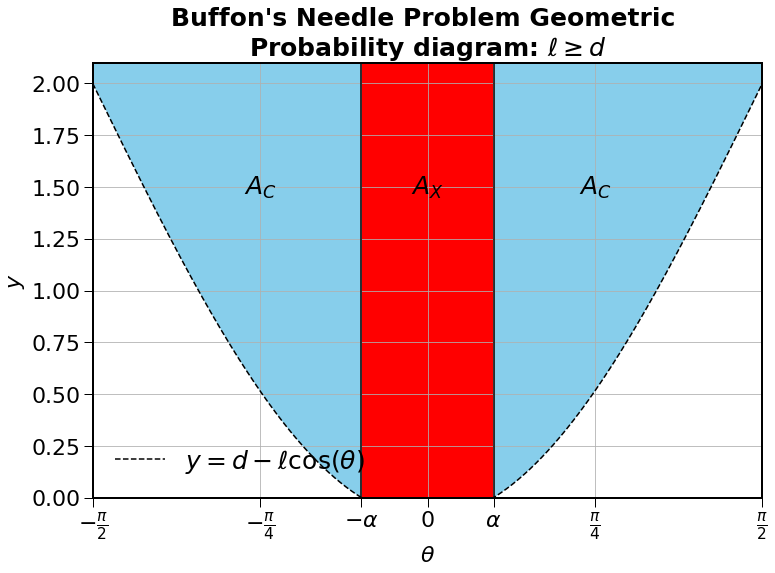

In [10]:
#Figure 7.5
fig, ax = plt.subplots(1,1,figsize=(12,8));

ax.plot(x, buff2, 'k--', label=r"$y = d-\ell\cos(\theta)$")
ax.axvline(x=-alpha, color='k')
ax.axvline(x=alpha, color='k')

ax.set_xlim(-0.5*np.pi, 0.5*np.pi)
ax.set_ylim(0, d+.1)
ax.set_title("Buffon's Needle Problem Geometric \nProbability diagram: $\ell \geq d$"
            ,fontweight="bold")
ax.fill_between(x, buff2, 4*np.ones(x.size), where=cross, fc='red')
ax.fill_between(x, buff2, 4*np.ones(x.size), where=cond, fc='skyblue')

ax.set_xlabel(r"$\theta$",size=22)
ax.set_xticks([-np.pi/2, -np.pi/4, -alpha, 0, alpha, np.pi/4, np.pi/2])
ax.set_xticklabels([r"$-\frac{\pi}{2}$", r"$-\frac{\pi}{4}$", r"$-\alpha$","0",
                    r"$\alpha$", r"$\frac{\pi}{4}$", r"$\frac{\pi}{2}$"]);
ax.set_ylabel("$y$",size=22)
ax.tick_params(labelsize=22)
ax.grid()
ax.legend(loc='lower left', fontsize=25)

ax.text(0, 1.5, "$A_X$", size=25, color='k',
            horizontalalignment="center", verticalalignment="center")
ax.text(np.pi/4, 1.5, "$A_C$", size=25, color='k',
            horizontalalignment="center", verticalalignment="center")
ax.text(-np.pi/4, 1.5, "$A_C$", size=25, color='k',
            horizontalalignment="center", verticalalignment="center")

plt.savefig("CH7;GeometricProbabilityofBuffonsLongNeedle.jpg")

### Computer Simulation of Buffon's Needle Problem

In [11]:
d = 2
l = 4 # Long Needle
n = 10_000
ys = rando.uniform(low=0, high=d, size=(n,1))
thetas = rando.uniform(low=-np.pi/2, high=np.pi/2, size=(n,1))
res = ys + l*np.cos(thetas)
k = len(np.where(res >= d)[0])

print(f"Probability of Needle Crossing by simulation: {k/n}")
print(f"Probability of Needle Crossing by derived formula: "
      f"{(2/(np.pi*d))*(np.arccos(d/l)*d + l - np.sqrt(l**2 - d**2))}")

Probability of Needle Crossing by simulation: 0.8387
Probability of Needle Crossing by derived formula: 0.8372484205582454


In [12]:
d = 4
l = 2 # Short Needle
n = 10_000
ys = rando.uniform(low=0, high=d, size=(n,1))
thetas = rando.uniform(low=-np.pi/2, high=np.pi/2, size=(n,1))
res = ys + l*np.cos(thetas)
k = len(np.where(res >= d)[0])

print(f"Probability of Needle Crossing by simulation: {k/n}")
print(f"Probability of Needle Crossing by derived formula: {(2*l)/(np.pi*d)}")

Probability of Needle Crossing by simulation: 0.3119
Probability of Needle Crossing by derived formula: 0.3183098861837907


In [13]:
coords = rando.uniform(low=-1, high=1, size=(10_000, 2))
reds = [i for (i, point) in enumerate(coords) if np.linalg.norm(point, 2) <= 1]

3.1376


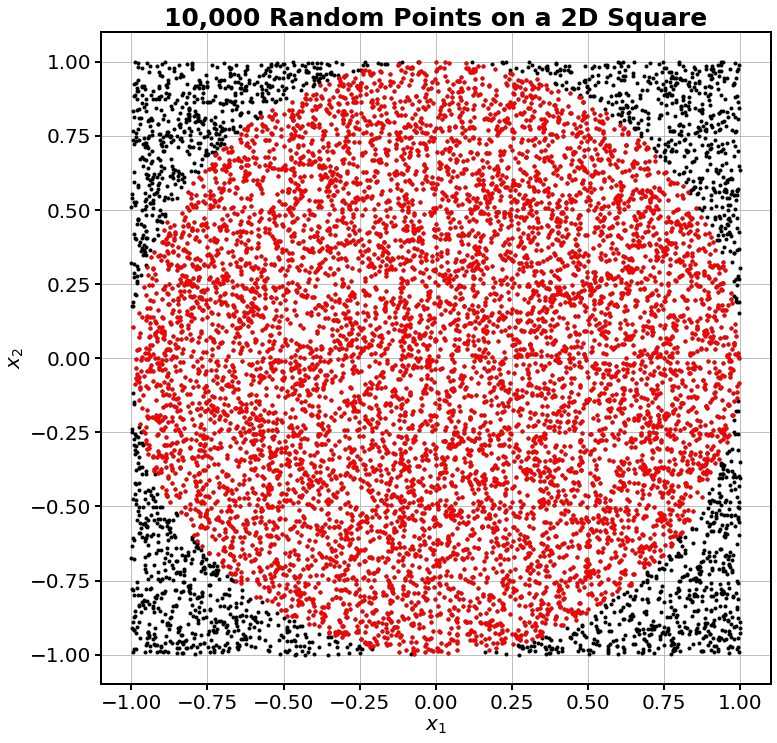

In [14]:
#Figure 7.6
fig, ax = plt.subplots(1,1, figsize=(12,12))
ax.plot(coords[:,0], coords[:,1], 'k.')
ax.plot(coords[reds,0], coords[reds,1], 'r.')
ax.set_title("10,000 Random Points on a 2D Square", size=25
            ,fontweight="bold")
ax.set_xlabel("$x_1$", size=20)
ax.set_ylabel("$x_2$", size=20)
ax.tick_params(length=6, width=2, labelsize=20)
ax.grid()

plt.savefig("CH7;10kRandomPoints.jpg")

print(4*len(reds)/len(coords[:,0]))

### $n$ - dimensional ball volume by Monte Carlo simulation

In [15]:
from scipy.special import gamma

In [16]:
N = 10_000 # Number of simulations
n = 9 # Dimension of ball
x = rando.uniform(low=-1, high=1, size=(N,n))

norms = np.linalg.norm(x, ord=2, axis=1)

k = len(np.where(norms < 1)[0])

print(f"Volume of 9-dimension ball by simulation: {(k/N)*2**n}")
print(f"Volume of 9-dimension ball by formula: {np.pi**(.5*n)/gamma(.5*n + 1)}")

Volume of 9-dimension ball by simulation: 3.9424
Volume of 9-dimension ball by formula: 3.2985089027387064


### Numerical Integration by Monte Carlo simulation
$$\int_a^b f(x)\ dx \approx \frac{b-a}{n}\sum_{i=1}^n f\left(a + i\cdot\frac{b-a}{n}\right) = (b-a)\bar{f}$$
where $\bar{f}$ is the mean of $f(x), \forall x \in [a,\ b]$.


#### Example 7.3: $\int_1^3 x^2\ dx = \frac{26}{3}= 8.\bar{6}$

In [17]:
f1 = lambda x: x**2

x = rando.uniform(1,3, 1_000)
print(f"Monte Carlo integration of f1(x) over [1, 3]: {(3-1)*np.mean(f1(x))}")

x2 = rando.uniform(1,3, 100_000)
print(f"Monte Carlo integration of f1(x) over [1, 3]: {(3-1)*np.mean(f1(x2))}")

x3 = rando.uniform(1,3, 10_000_000)
print(f"Monte Carlo integration of f1(x) over [1, 3]: {(3-1)*np.mean(f1(x3))}")

Monte Carlo integration of f1(x) over [1, 3]: 8.757222932058058
Monte Carlo integration of f1(x) over [1, 3]: 8.654556454333342
Monte Carlo integration of f1(x) over [1, 3]: 8.662865265009732


#### Example 7.4: $\int_{-1}^2 \frac{\exp(-x^2)}{1+x^2}\ dx = 1.289754$

In [18]:
f2 = lambda x: np.exp(-x**2)/(1 + x**2)

x = rando.uniform(-1,2, 10_000)

print(f"Monte Carlo integration of f2(x) over [-1, 2]: {(2-(-1))*np.mean(f2(x))}")
print(f"Numerical Integration of f2(x) over [-1, 2]: {integrate.quad(f2, -1, 2)[0]}")

Monte Carlo integration of f2(x) over [-1, 2]: 1.2953479444504175
Numerical Integration of f2(x) over [-1, 2]: 1.2897541843499358


#### Example 7.5: $\int_D (1 + r^2)\ dV,\ r^2 = x_1^2 + \cdots + x_5^2,\ D \subset \mathbb{R}^5$

In [19]:
n = 5
N = 10_000
x = rando.uniform(-1, 1, size=(N, n))
ranges = [(0, 1)]*5

y = np.linalg.norm(x, ord=2, axis=1)

inside = np.where(y < 1)[0]

r = (x[inside,0], x[inside,1], x[inside,2], x[inside,3], x[inside,4])

f3 = lambda x1, x2, x3, x4, x5: 1 + x1**2 + x2**2 + x3**2 + x4**2 + x5**2

V5 = np.pi**(.5*n)/gamma(.5*n + 1)

print(f"Monte Carlo Integration of f3(x) over D: {V5*np.mean(f3(*r))}")

Monte Carlo Integration of f3(x) over D: 9.009327028764368


### Markov Chains

In [20]:
def matrix_power(A, n):
    """
    This function raises a square matrix A to a natural number n-th
    power by exploiting a useful property of eigenvalue decomposition.

    That property is detailed below.
    """
    assert 0 <= n == int(n) and A.shape[0] == A.shape[1], \
        "Only natural number powers and squares matrices."
    if n == 0:
        return np.identity(A.shape[0])
    elif n == 1:
        return A
    else:
        d, M = np.linalg.eig(A)
        invM = np.linalg.inv(M)
        return M@np.diag(d**n)@invM

Given a square matrix $A$, $A^n,\ n \in \mathbb{N}$ may be computed like so:
$$A^n = M\cdot \Lambda^n\cdot M^{-1}$$
Where $\Lambda$ is a diagonal matrix with the eigenvalues of $A$ as it's elements,
and $M$ is the transition matrix with the eigenvectors of $A$ as it's columns.

In [21]:
P = np.array([[1/3, 1/3, 1/3], [.7, .3, 0], [1, 0, 0]])
v1 = np.array([[1/3, 1/3, 1/3]])
print(f"P:\n{P}\n")
print(f"P^3:\n{matrix_power(P, 3)}\n")

print(f"P^(10):\n{matrix_power(P, 10)}\n")
print(f"P^(20):\n{matrix_power(P, 20)}\n")

A = P.T - np.identity(P.shape[0])
A[2] = [1,1,1]
b = np.array([[0,0,1]]).T
v2 = np.linalg.solve(A, b)
print(f"v2:\n{v2}\n")

D = P.T - np.identity(P.shape[0]) + np.array([[1,1,1],[0,0,0],[0,0,0]])
y = np.array([[1,0,0]]).T

v3 = np.linalg.solve(D, y)
print(f"v3:\n{v3}\n")

P:
[[0.33333333 0.33333333 0.33333333]
 [0.7        0.3        0.        ]
 [1.         0.         0.        ]]

P^3:
[[0.48481481 0.28925926 0.22592593]
 [0.60744444 0.24477778 0.14777778]
 [0.67777778 0.21111111 0.11111111]]

P^(10):
[[0.55365244 0.26275702 0.18359054]
 [0.55178973 0.26348849 0.18472177]
 [0.55077163 0.26388825 0.18534013]]

P^(20):
[[0.55263411 0.2631569  0.18420899]
 [0.55262949 0.26315871 0.18421179]
 [0.55262696 0.26315971 0.18421333]]

v2:
[[0.55263158]
 [0.26315789]
 [0.18421053]]

v3:
[[0.55263158]
 [0.26315789]
 [0.18421053]]

